In [16]:
import colour_scheme as cs
import importlib
importlib.reload(cs)

import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

path_fig = '/links/groups/treutlein/USERS/nazbukina/fatima_revision/figures/'

import sys
sys.path.append('/links/groups/treutlein/USERS/zhisong_he/Work/brain_organoid_atlas/ext/')
import codes.py_wknn as wknn

sc.settings.figdir = path_fig+'/HNOCA_mapping/'
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=300, format='pdf')
colors = ["#D3D3D3", 
    
    "#fbe3c2", "#f2c88f", "#ecb27d", "#e69c6b", "#d37750", "#b9563f", "#92351e"]

In [2]:
import os
import scarches
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hnoca.map as hmap
import hnoca.stats as stats

 captum (see https://github.com/pytorch/captum).


In [3]:
query_adata = sc.read_h5ad('/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/OSMGT_raw.h5ad')
#query_adata.obs["batch"] = query_adata.obs["sample"].astype(str).copy()
metadata = pd.read_csv("/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/meta_OSMGT.tsv", sep='\t')
query_adata.obs['merged_cluster_annotation'] = metadata.merged_cluster_annotation
query_adata.obs['Condition'] = metadata.Condition
query_adata

AnnData object with n_obs × n_vars = 100538 × 33421
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'Condition', 'Morphogen', 'Morphogen_AP', 'Dose_AP', 'Timing', 'Morphogen_DV', 'Dose_DV', 'Timing_DV', 'Morphogen_F', 'Dose_F', 'Timing_F', 'Cell_Line', 'Timing_AP', 'BEST', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'nCount_exon', 'nFeature_exon', 'nCount_intron', 'nFeature_intron', 'maxsim_linnarsson', 'maxsim_mmgastrul', 'maxsim_fleck', 'css_normdist_fleck', 'css_faillh_fleck', 'maxsim_region', 'cssproj_region', 'seurat_cluster_annotation', 'merged_cluster_annotation', 'Germ_Layer', 'Experiment', 'Condition_raw', 'Cell_Line_raw', 'Condition_ident', 'Condition_ident_line', 'batch'
    obsm: 'X_rsspca_cc', 'X_rsspca_dimsnocc', 'X_rsspca_joint', 'X_umap_joint', 'X_umap

In [3]:
#out = "/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/OSMGT_2_HNOCA/"

hnoca_adata = sc.read("/links/groups/treutlein/USERS/zhisong_he/Work/brain_organoid_atlas/data/phase3_final_0516/ZH_processed_cleanup_highvar_counts.h5ad")




In [7]:
#import torch
#model_path = "/links/groups/treutlein/USERS/zhisong_he/Work/brain_organoid_atlas/data/VAE_models/scpoli_hierarchical123"
#model = scarches.models.scPoli
#hnoca_model = model.load(model_path, hnoca_adata, map_location=torch.device('cpu'))


In [10]:
hnoca_adata

AnnData object with n_obs × n_vars = 1770578 × 3000
    obs: 'assay_sc', 'assay_differentiation', 'assay_type_differentiation', 'bio_sample', 'cell_line', 'cell_type', 'development_stage', 'disease', 'ethnicity', 'gm', 'id', 'individual', 'organ', 'sex', 'state_exact', 'sample_source', 'source_doi', 'tech_sample', 'organoid_age_days', 'organoid_age_weeks', 'organoid_age_months', 'publication', 'doi', 'batch', 'publication_protocol', 'suspension_type_original', 'cell_line_original', 'cell_type_original', 'development_stage_original', 'disease_original', 'ethnicity_original', 'organ_original', 'organism_original', 'sex_original', 'obs_names_original', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'snapseed_level_1', 'snapseed_level_2', 'snapseed_level_3', 'snapseed_level_4', 'snapseed_level_5', 'annot_level_1', 'annot_level_2', 'annot_level_3', 'annot_level_4', 'annot_region', 'CorrDiff_t

In [9]:
hnoca_adata.obs.head()

assay_sc  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  BD Rhapsody Whole Transcriptome Analysis   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  BD Rhapsody Whole Transcriptome Analysis   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  BD Rhapsody Whole Transcriptome Analysis   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  BD Rhapsody Whole Transcriptome Analysis   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  BD Rhapsody Whole Transcriptome Analysis   

                                                                               assay_differentiation  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Andersen, 2020 (doi: 10.1016/j.cell.2020.11.017)   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Andersen, 2020 (doi: 10.1016/j.cell.2020.11.017)   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Andersen, 2020 (doi: 10.1016/j.cell.2020.11.017)   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Andersen, 2020 (doi: 10.1016/j.cell.2020.11.017)   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Andersen, 2020 (doi: 10.1016/j.cell.2020.11.017)   

                                                   assay_type_differentiation  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...                     guided   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...                     guided   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...                     guided   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...                     guided   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...                     guided   

                                                                                           bio_sample  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  homosapiens_hindbrain_2020_bdrhapsodywholetran...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  homosapiens_hindbrain_2020_bdrhapsodywholetran...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  homosapiens_hindbrain_2020_bdrhapsodywholetran...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  homosapiens_hindbrain_2020_bdrhapsodywholetran...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  homosapiens_hindbrain_2020_bdrhapsodywholetran...   

                                                        cell_line cell_type  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  custom_8858-1   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  custom_8858-1   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  custom_8858-1   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  custom_8858-1   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  custom_8858-1   unknown   

                                                    development_stage  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Carnegie stage 18   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Carnegie stage 18   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Carnegie stage 18   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Carnegie stage 18   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  Carnegie stage 18   

                                                    disease ethnicity  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown   unknown   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown   unknown   

                                                         gm  ...  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown  ...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown  ...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown  ...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown  ...   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  unknown  ...   

  

In [4]:
import pickle

out = "/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/OSMGT_2_HNOCA/"
file = open(os.path.join(out, "presence.pickle"),'rb')
presence_scores = pickle.load(file)

presence_scores['max']

homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_53    0.092789
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_69    0.161601
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_72    0.095557
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_76    1.000000
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_78    0.430754
                                                                                                                       ...   
homosapiens_cerebralcortex_2017_smartseq2_sloansteven_001_d10_1016_j_neuron_2017_07_035_706                          0.303052
homosapiens_cerebralcortex_2017_smartseq2_sloansteven_001_d10_1016_j_neuron_2017_07_035_707                          0

In [11]:
#presence_scores['per_group'].filter(regex='Control')

In [5]:
hnoca_adata.obs['presence_max_OSMGT_morphogen'] = presence_scores['max']
import re
hnoca_adata.obs['presence_max_OSMGT_ctrl'] = presence_scores['per_group'].filter(regex='Control').max(axis=1)

hnoca_adata.obs['presence_max_OSMGT_treatment'] = presence_scores['per_group'][np.setdiff1d(presence_scores['per_group'].columns, 
                                                                                         presence_scores['per_group'].filter(regex='Control').columns)].max(axis=1)

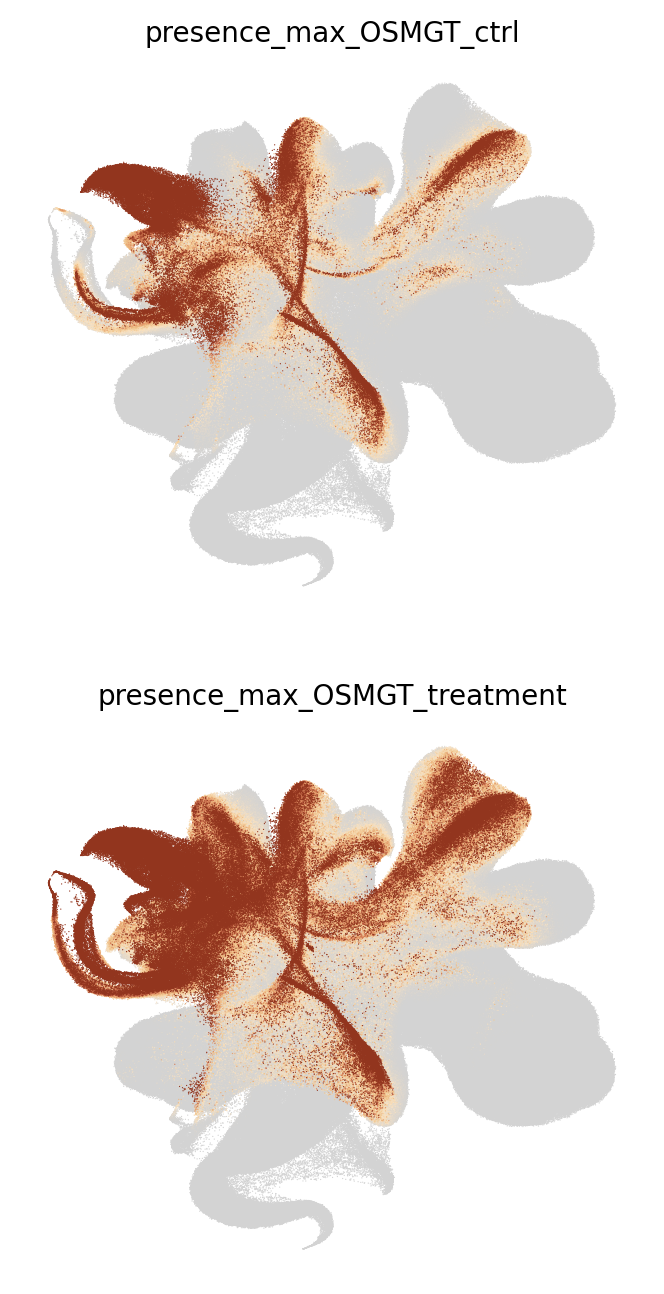

In [21]:
import matplotlib.colors as mcolors
colors = ["#D3D3D3", 
    
    "#fbe3c2", "#f2c88f", "#ecb27d", "#e69c6b", "#d37750", "#b9563f", "#92351e"]

cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap_with_gray", colors)
fig, ax = plt.subplots(2,1,figsize=(4,8))
#sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_OSMGT_morphogen'], frameon=False, color_map='RdYlBu', ax=ax[0], show=False, size=0.8)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_OSMGT_ctrl'], frameon=False, 
                color_map=cmap, ax=ax[0], show=False, size=0.8,colorbar_loc=None)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_OSMGT_treatment'], frameon=False, 
                color_map=cmap, ax=ax[1], show=False, size=0.8,colorbar_loc=None)
plt.savefig(path_fig+'HNOCA_mapping/OSMGT_presence_score_HNOCA_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()


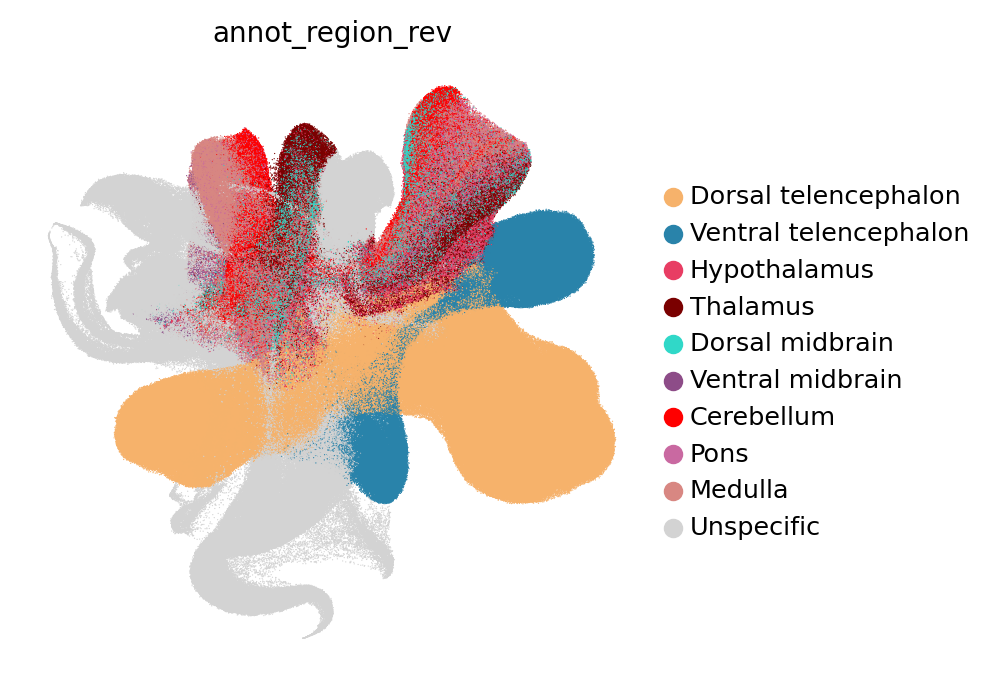

In [18]:
region_color = {

                    'Medulla':"#d88782",
                   'Pons':"#c969a1",
                   'Ventral midbrain':'#8d4c88',
                   'Cerebellum':'red',
                   'Dorsal midbrain':'#30d8c8',
                   'Thalamus': '#7A0000',
                   'Hypothalamus':'#e83d63',
                   'Unspecific':'lightgray',
                   'Ventral telencephalon':'#2983aa',
                   'Dorsal telencephalon':'#f6b26b'
                   
}


#with plt.rc_context({'figure.figsize' : (4,4)}):
   # sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=[ 'annot_region_rev'], frameon=False,ncols=2, s=0.8, palette = region_color,
                   #save = 'region_umap.png', legend_loc=None)

plt.rcParams['pdf.fonttype'] = 42 
with plt.rc_context({'figure.figsize' : (4,4)}):
    sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=[ 'annot_region_rev'], frameon=False,ncols=2, s=0.8, palette = region_color,
                   save = 'region_umap_legend.pdf')

#


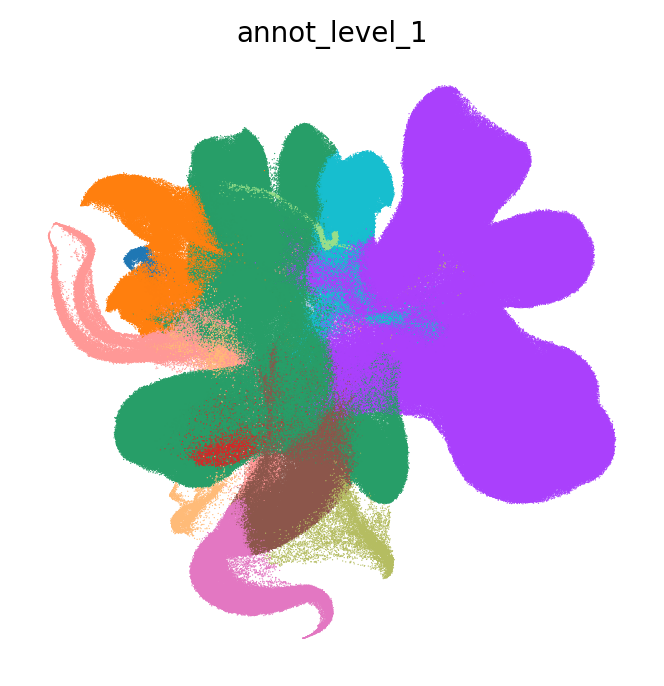

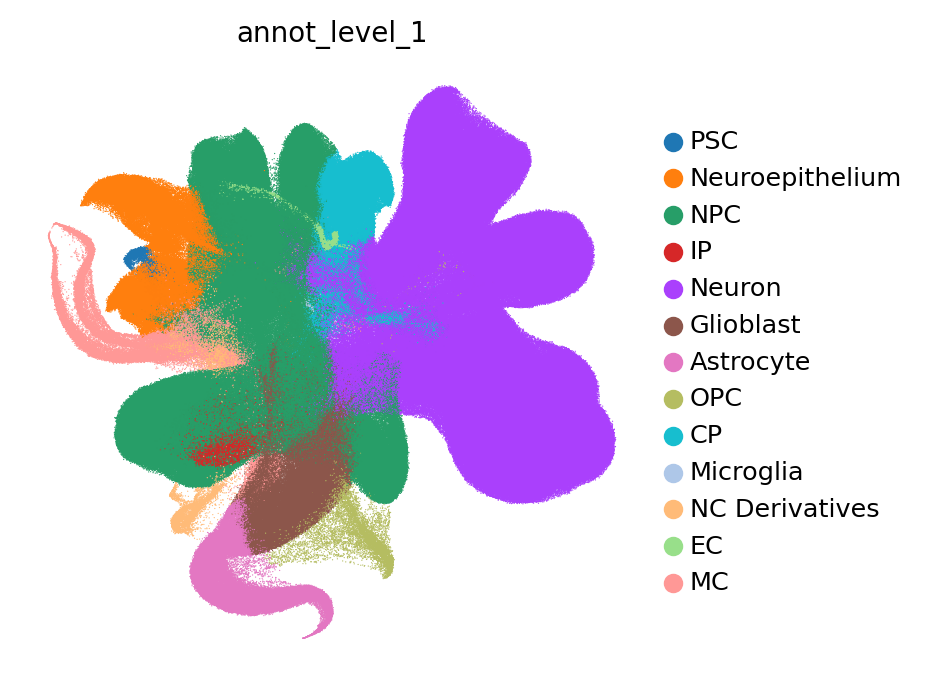

In [19]:
with plt.rc_context({'figure.figsize' : (4,4)}):
    sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=[ 'annot_level_1'], frameon=False,ncols=2, s=0.8, 
                   save = 'cell_class_umap.png', legend_loc=None)
plt.rcParams['pdf.fonttype'] = 42 
with plt.rc_context({'figure.figsize' : (4,4)}):
    sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=[ 'annot_level_1'], frameon=False,ncols=2, s=0.8,
                   save = 'cell_class_umap_legend.pdf')

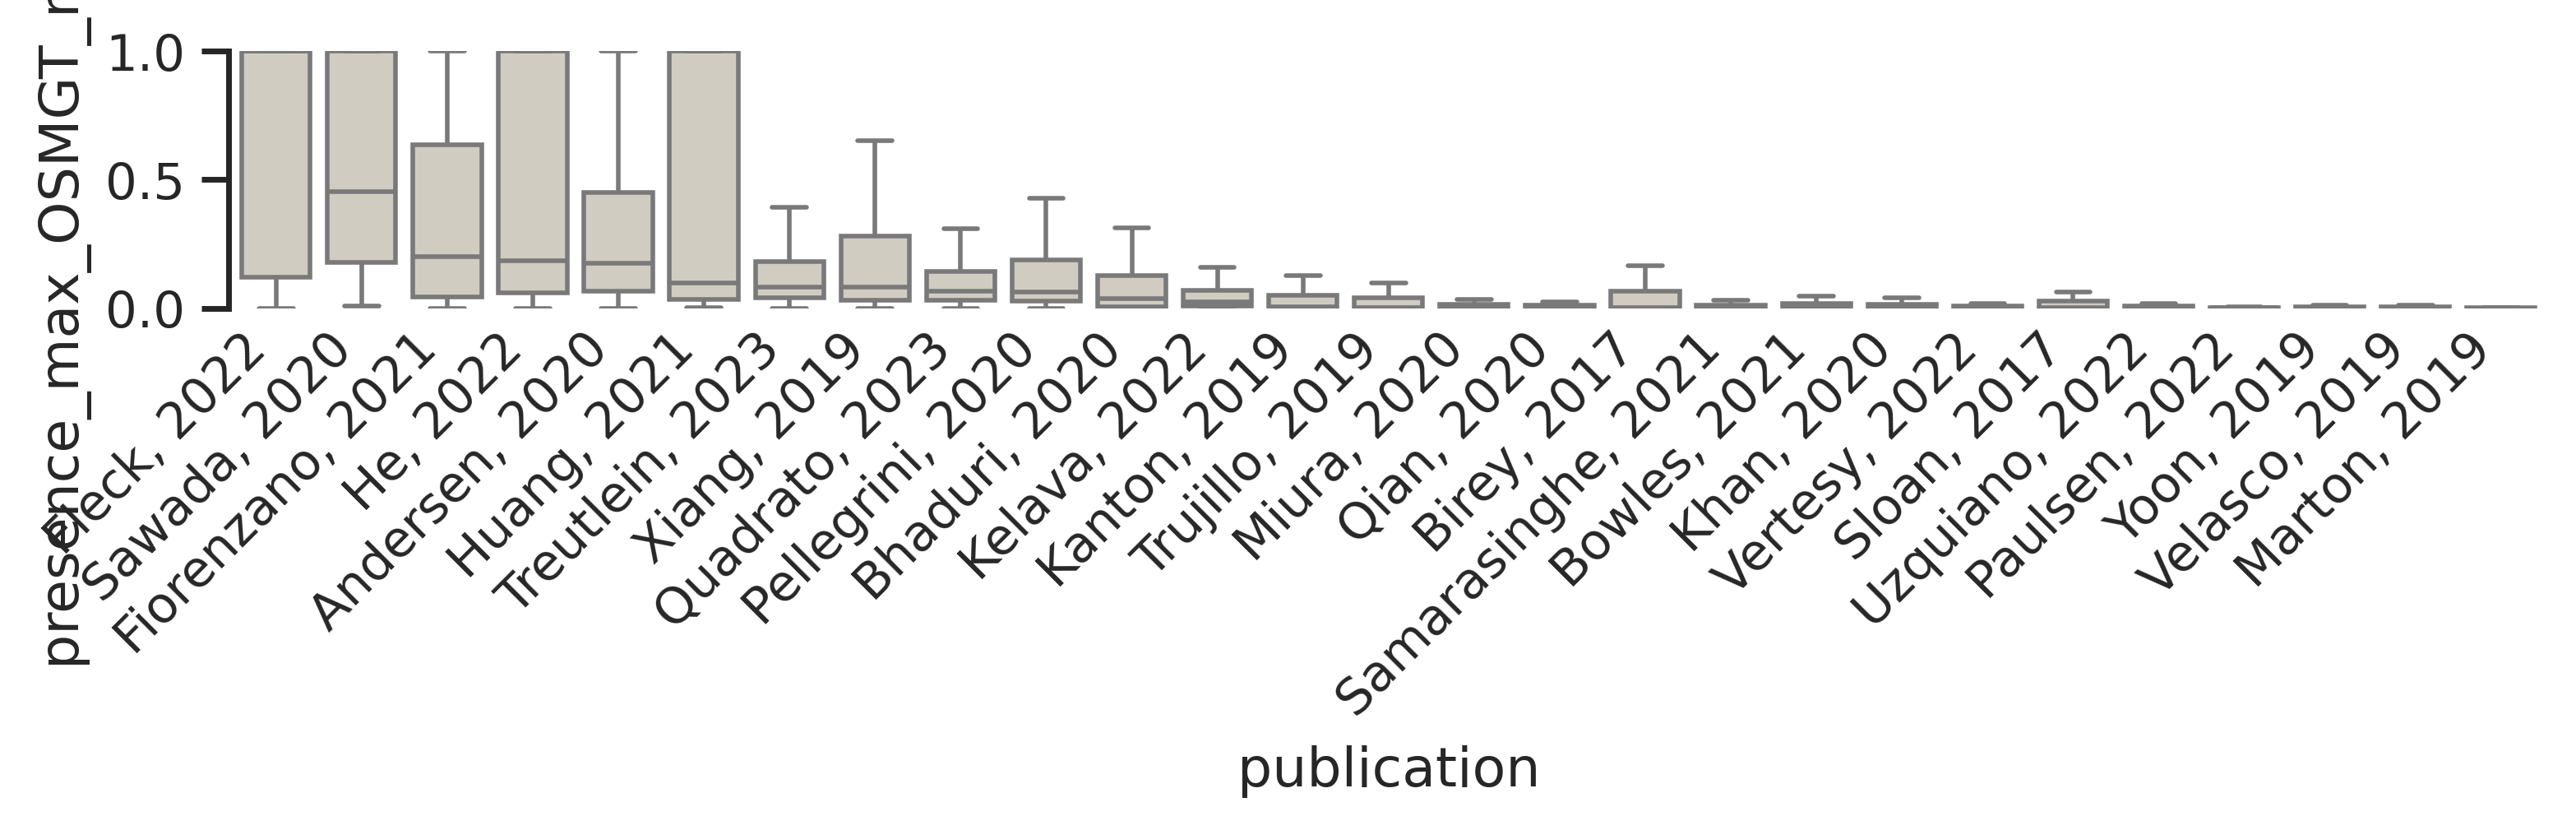

In [36]:
plot_barplots(hnoca_adata.obs, "publication","presence_max_OSMGT_morphogen", path_fig + 'HNOCA_mapping/OSMGT_publications.pdf')

In [26]:
def plot_barplots(df, x,y, figsize = None,save=None):
    sns.set_style("white")
    sns.set_style('ticks')
    my_order = df.groupby(by=[x])[y].median().sort_values().iloc[::-1].index
    if figsize:
        fig, ax = plt.subplots(figsize=figsize) 
    else:
        fig, ax = plt.subplots(figsize=(len(df[x].unique())/3.375, 4)) 
        
    ax.set_aspect(3)
    plot = sns.boxplot(
    data=df, 
    y=y, 
    x=x, 
    order=my_order, 
    color="#D3CDBF", 
    showfliers=False,
    ax=ax)
    
    sns.despine(ax=plot, offset=1, trim=True, bottom=True)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
      # Adjust this ratio to control the width-to-height relationship
    plot.set_yticks([0,0.5, 1.0])  
    plot.set_ylim((0, 1)) 
    ax.tick_params(axis='x', length=0)
   
    plt.ylabel('')
   
    plt.tight_layout()
    
    # Save the figure
    if save:
        plt.savefig(save, dpi=300)
    plt.show()

    
    
    

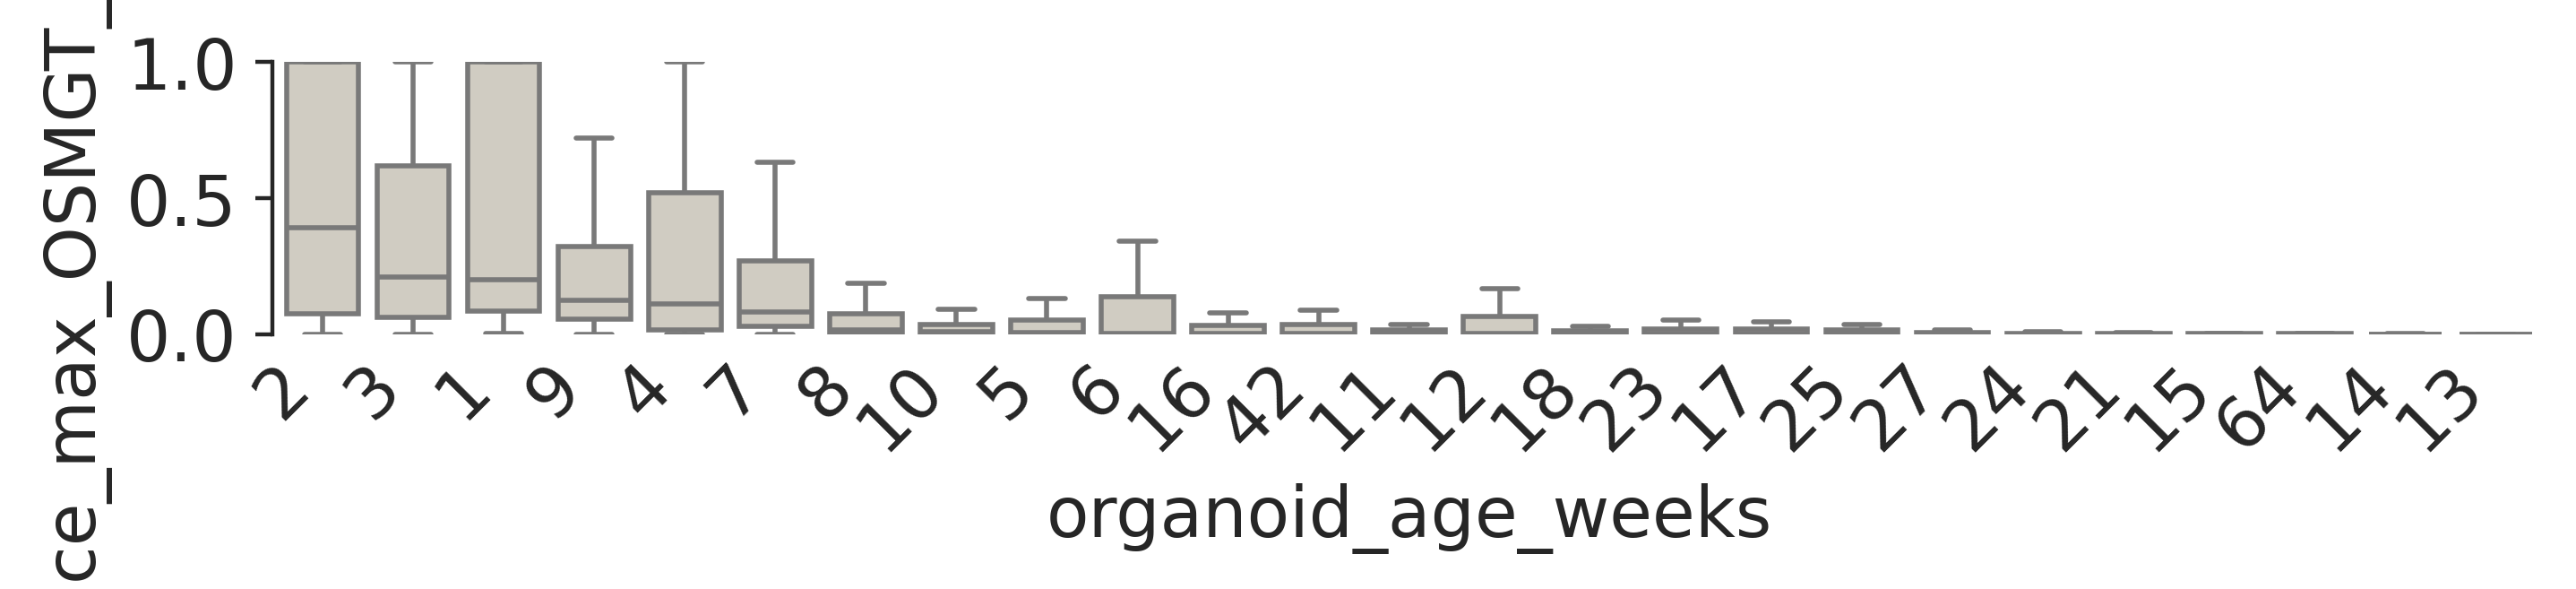

In [14]:
hnoca_adata.obs.organoid_age_weeks=hnoca_adata.obs.organoid_age_weeks.astype(int).astype(str)
plot_barplots(hnoca_adata.obs, "organoid_age_weeks","presence_max_OSMGT_morphogen", path_fig + 'HNOCA_mapping/OSMGT_organoid_age_weeks.pdf')

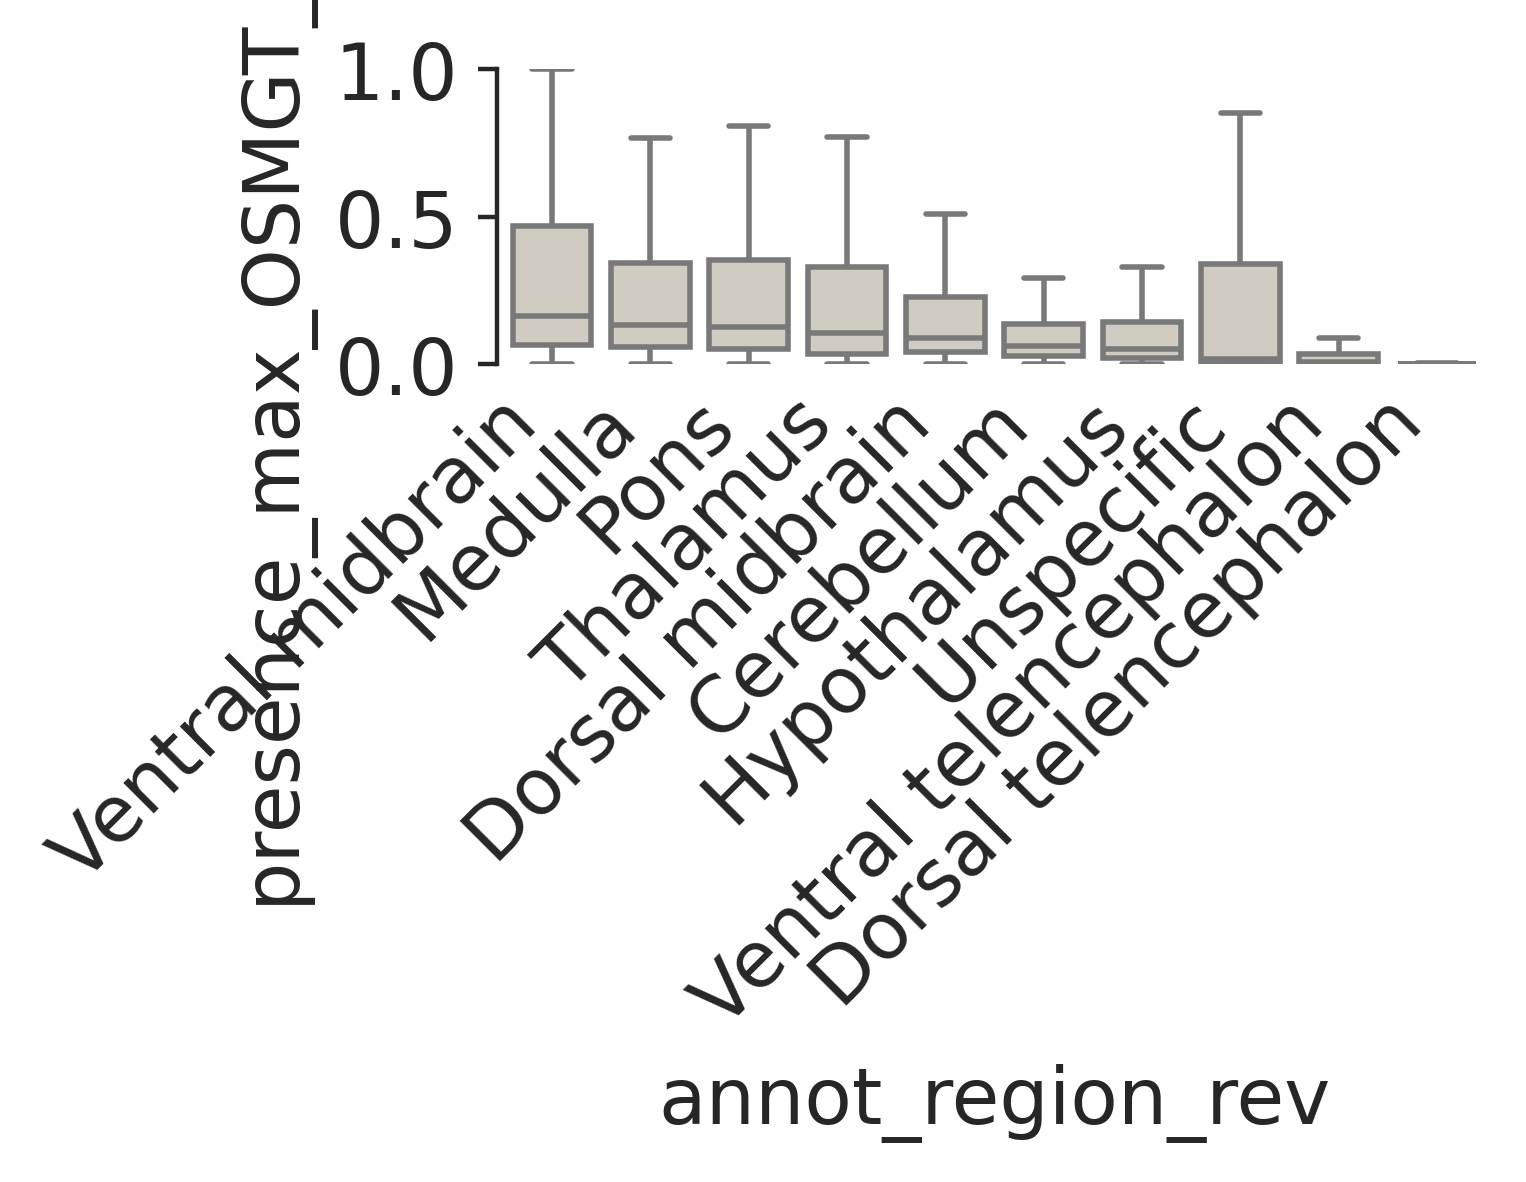

In [24]:
plot_barplots(hnoca_adata.obs, "annot_region_rev","presence_max_OSMGT_morphogen", (4,4),path_fig + 'HNOCA_mapping/OSMGT_organoid_annot_region_rev.pdf')

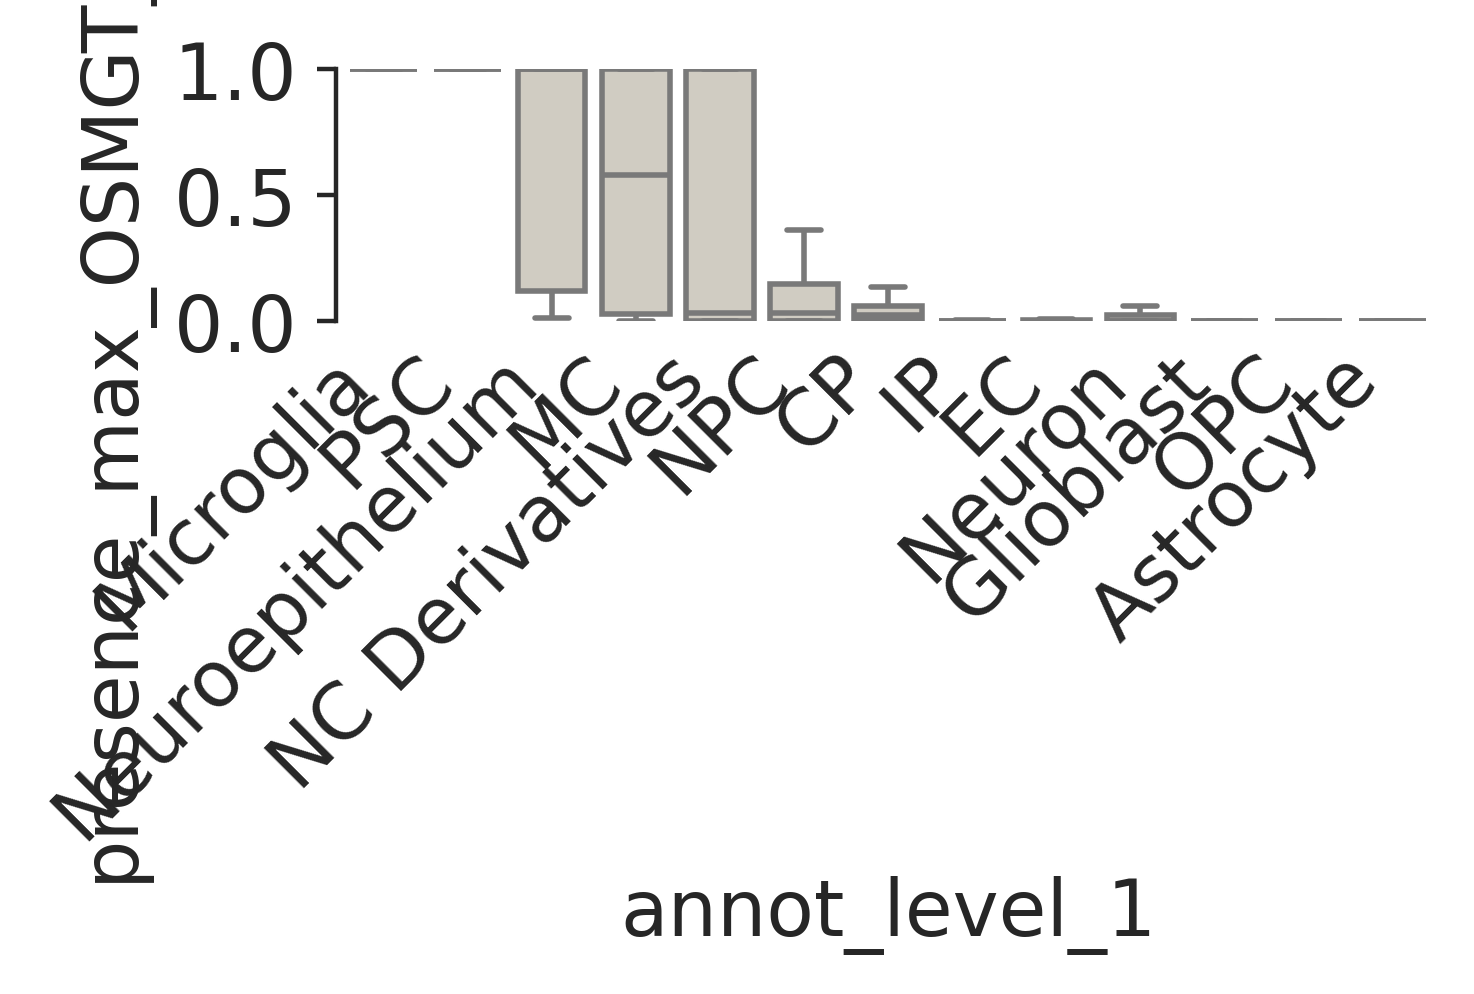

In [25]:
plot_barplots(hnoca_adata.obs, "annot_level_1","presence_max_OSMGT_morphogen", save=path_fig + 'HNOCA_mapping/OSMGT_organoid_annot_level_1.pdf')

# PARSE

In [8]:
import pickle
out2 = "/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/parse_2_HNOCA/"

file = open(os.path.join(out2, "presence.pickle"),'rb')
presence_scores = pickle.load(file)

presence_scores['max']

homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_53    0.025319
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_69    0.016266
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_72    0.152647
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_76    0.075806
homosapiens_hindbrain_2020_bdrhapsodywholetranscriptomeanalysis_andersenjimena_001_d10_1016_j_cell_2020_11_017_78    0.006552
                                                                                                                       ...   
homosapiens_cerebralcortex_2017_smartseq2_sloansteven_001_d10_1016_j_neuron_2017_07_035_706                          0.024960
homosapiens_cerebralcortex_2017_smartseq2_sloansteven_001_d10_1016_j_neuron_2017_07_035_707                          0

In [32]:
#query_parse = sc.read_h5ad('/links/groups/treutlein/USERS/nazbukina/fatima_revision/data/exp1_raw.h5ad')
#query_parse

AnnData object with n_obs × n_vars = 214059 × 43558
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'lib', 'original_name', 'condition\xa0', 'condition_name_full', 'cell_line_1', 'cell_line_2', 'batch', 'medium', 'morphogen', 'morphogen_full'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [44]:
with open(os.path.join(out2, "presence.pickle"), 'wb') as f:
    pickle.dump(obj=presence_scores, file=f)

In [34]:
#query_parse.obs['medium_morphogen'] = query_parse.obs['medium'].astype(str) + '_' +  query_parse.obs['morphogen_full'].astype(str) 
#query_parse.obs['medium_morphogen']

original_name
01_01_21__s1       NIM_Ctrl
01_01_23__s1       NIM_Ctrl
01_01_26__s1       NIM_Ctrl
01_01_31__s1       NIM_Ctrl
01_01_38__s1       NIM_Ctrl
                   ...     
96_93_67__s4    NPM_CHIR_tE
96_93_84__s4    NPM_CHIR_tE
96_94_19__s4    NPM_CHIR_tE
96_94_34__s4    NPM_CHIR_tE
96_94_87__s4    NPM_CHIR_tE
Name: medium_morphogen, Length: 214059, dtype: object

In [35]:
mapper2 = hmap.AtlasMapper.load(out2)

Info: Smoothing presence scores with random walk


100%|█████████████████████████████████████████████| 1/1 [01:06<00:00, 66.63s/it]


In [42]:
mapper2.query_adata.obs['medium_morphogen'] = mapper2.query_adata.obs['medium'].astype(str) + '_' +  mapper2.query_adata.obs['morphogen_full'].astype(str) 

In [43]:
presence_scores = mapper2.get_presence_scores(split_by="medium_morphogen")
presence_scores['per_group']

Info: Smoothing presence scores with random walk


100%|███████████████████████████████████████████| 24/24 [25:37<00:00, 64.07s/it]


NIM_Ctrl  NIM_SHH_A  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.015429   0.009316   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.005418   0.005653   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.009196   0.004575   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.003300   0.002099   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.001896   0.001311   
...                                                      ...        ...   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.008284   0.000608   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000979   0.000102   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000062   0.000009   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000238   0.000027   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.008010   0.005302   

                                                    NIM_SHH_E  NIM_RA_A  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...   0.006097  0.024345   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...   0.004479  0.014701   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...   0.152647  0.018906   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...   0.001390  0.008307   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...   0.001084  0.004828   
...                                                       ...       ...   
homosapiens_cerebralcortex_2017_smartseq2_sloan...   0.000066  0.000541   
homosapiens_cerebralcortex_2017_smartseq2_sloan...   0.000017  0.000146   
homosapiens_cerebralcortex_2017_smartseq2_sloan...   0.000002  0.000015   
homosapiens_cerebralcortex_2017_smartseq2_sloan...   0.000005  0.000039   
homosapiens_cerebralcortex_2017_smartseq2_sloan...   0.003219  0.014173   

                                                    NIM_RA_E  NIM_CHIR_A  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.018798    0.010072   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.016266    0.005697   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.024283    0.005289   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.009234    0.002248   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  0.005091    0.001360   
...                                                      ...         ...   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000026    0.001752   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000012    0.000251   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000002    0.000018   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.000004    0.000063   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  0.018170    0.007387   

                                                      NIM_CHIR_E  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  1.030573e-03   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  1.452793e-03   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  1.023099e-03   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  3.817150e-04   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...  1.629642e-04   
...                                                          ...   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  1.625030e-06   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  1.129975e-06   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  3.326693e-07   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  3.054496e-07   
homosapiens_cerebralcortex_2017_smartseq2_sloan...  1.954308e-02   

                                                    NIM_FGF8_late_A  \
homosapiens_hindbrain_2020_bdrhapsodywholetrans...         0.014539   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...         0.005262   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...         0.009376   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...         0.003233   
homosapiens_hindbrain_2020_bdrhapsodywholetrans...         0.001871   
...                                                             ...   
homosapiens_cerebralcor

In [9]:
hnoca_adata.obs['presence_max_NIM'] = presence_scores['per_group'].filter(regex='NIM_').max(axis=1)
import re
hnoca_adata.obs['presence_max_ctrl_NIM'] = presence_scores['per_group'].loc[:,['NIM_Ctrl']]
hnoca_adata.obs['presence_max_treatment_NIM'] = presence_scores['per_group'][np.setdiff1d(presence_scores['per_group'].filter(regex='NIM_').columns, ['NIM_Ctrl'])].max(axis=1)

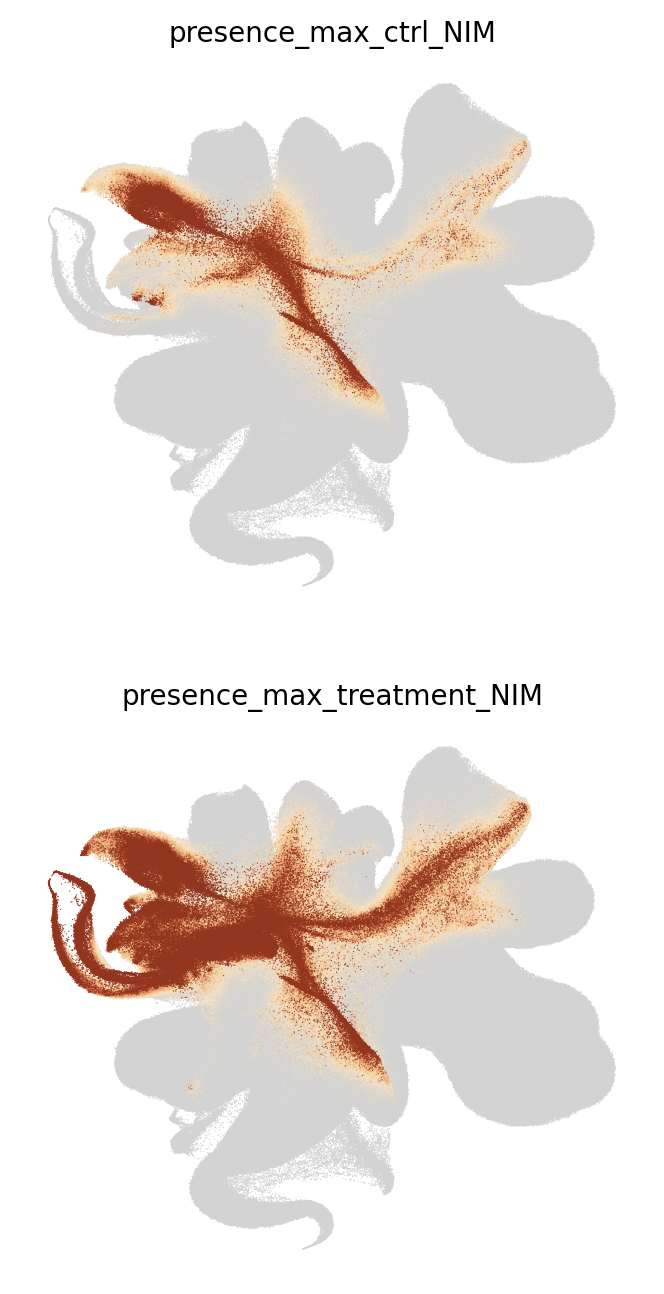

In [22]:
fig, ax = plt.subplots(2,1,figsize=(4,8))
#sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_NIM'], frameon=False, color_map='RdYlBu', ax=ax[0], show=False, size=0.8)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_ctrl_NIM'], 
                frameon=False, color_map=cmap, ax=ax[0], show=False, size=0.8,colorbar_loc=None)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_treatment_NIM'], 
                frameon=False, color_map=cmap, ax=ax[1], show=False, size=0.8,colorbar_loc=None)
plt.savefig(path_fig+'HNOCA_mapping/NIM_presence_score_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()


In [12]:

hnoca_adata.obs['presence_max_NPM'] = presence_scores['per_group'].filter(regex='NPM_').max(axis=1)
import re
hnoca_adata.obs['presence_max_ctrl_NPM'] = presence_scores['per_group'].loc[:,['NPM_Ctrl']]
hnoca_adata.obs['presence_max_treatment_NPM'] = presence_scores['per_group'][np.setdiff1d(presence_scores['per_group'].filter(regex='NPM_').columns, ['NPM_Ctrl'])].max(axis=1)

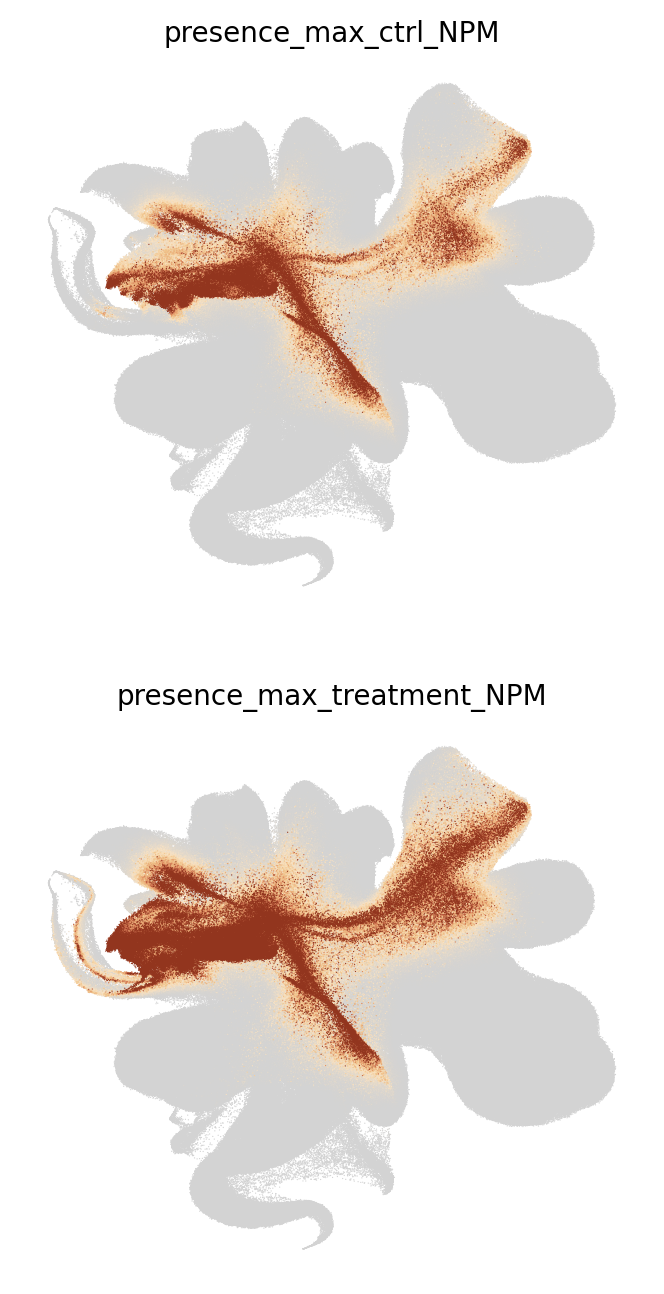

In [23]:
fig, ax = plt.subplots(2,1,figsize=(4,8))
#sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_NPM'], frameon=False, color_map='RdYlBu', ax=ax[0], show=False, size=0.8)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_ctrl_NPM'], frameon=False, 
                color_map=cmap, ax=ax[0], show=False, size=0.8,colorbar_loc=None)
sc.pl.embedding(hnoca_adata, basis='X_umap_scpoli', color=['presence_max_treatment_NPM'],
                frameon=False, color_map=cmap, ax=ax[1], show=False, size=0.8,colorbar_loc=None)
plt.savefig(path_fig+'HNOCA_mapping/NPM_presence_score_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()



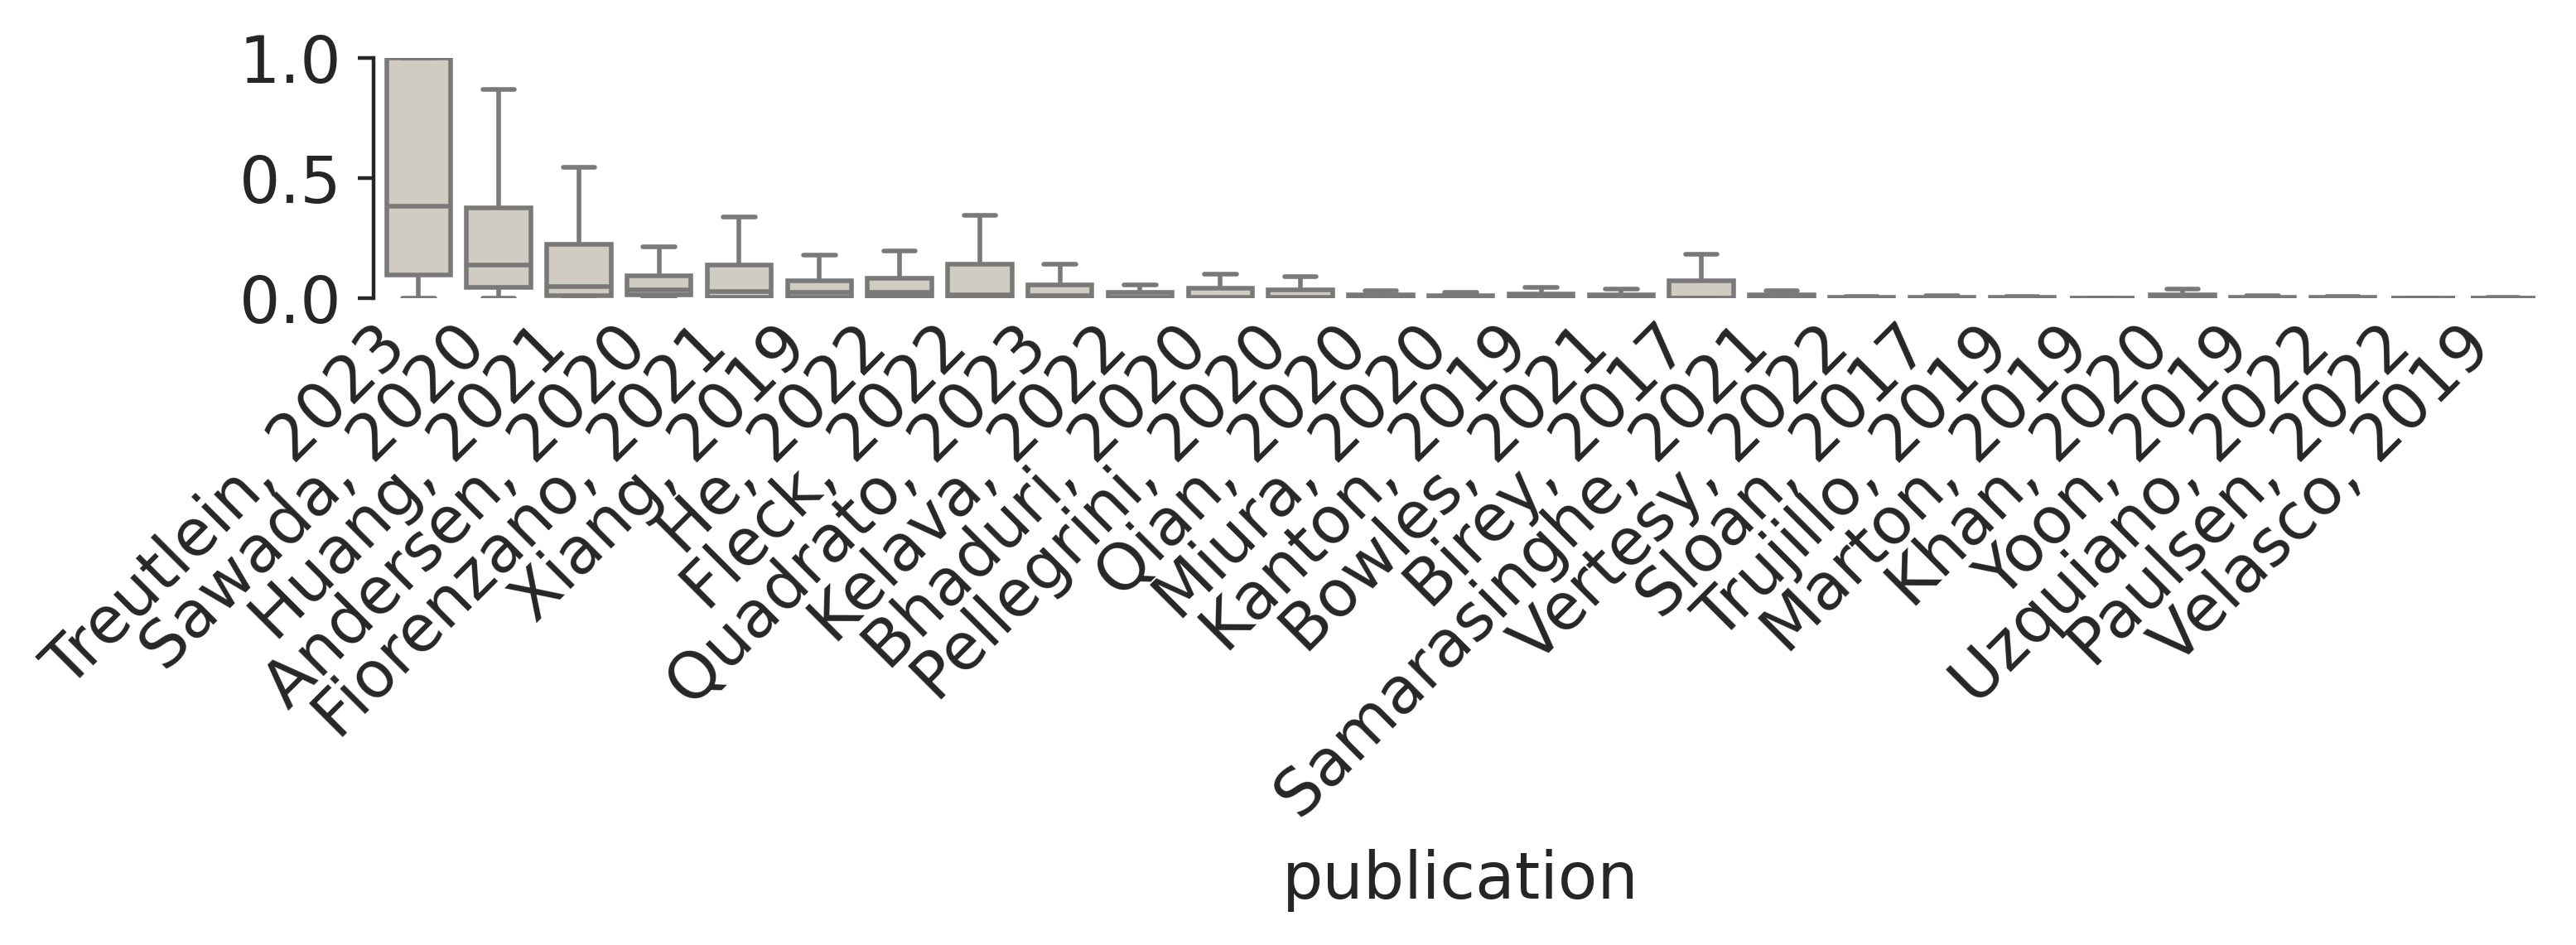

In [59]:
plot_barplots(hnoca_adata.obs, "publication","presence_max_NPM", save=path_fig + 'HNOCA_mapping/NPM_publications.pdf')

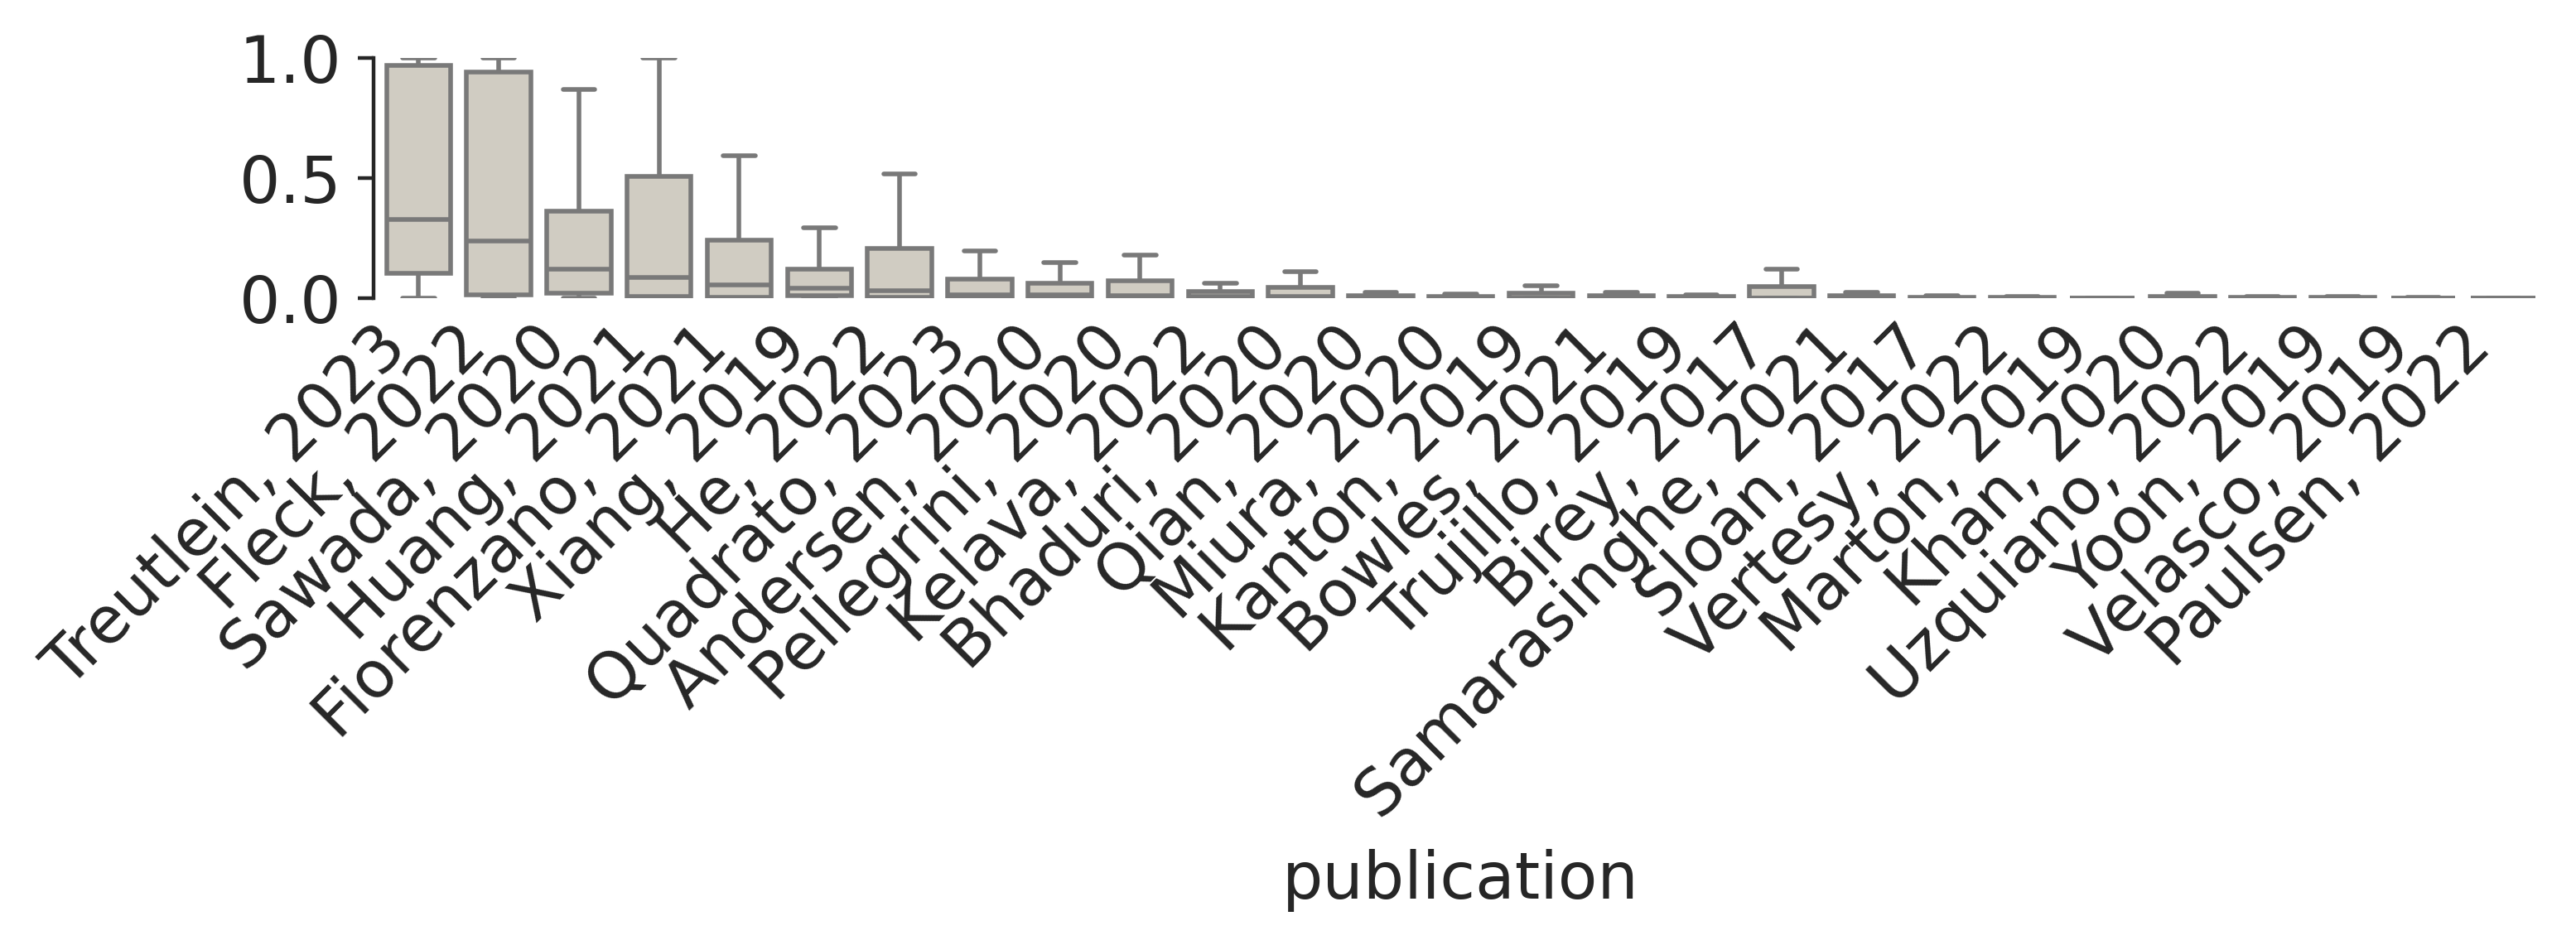

In [60]:
plot_barplots(hnoca_adata.obs, "publication","presence_max_NIM", save=path_fig + 'HNOCA_mapping/NIM_publications.pdf')

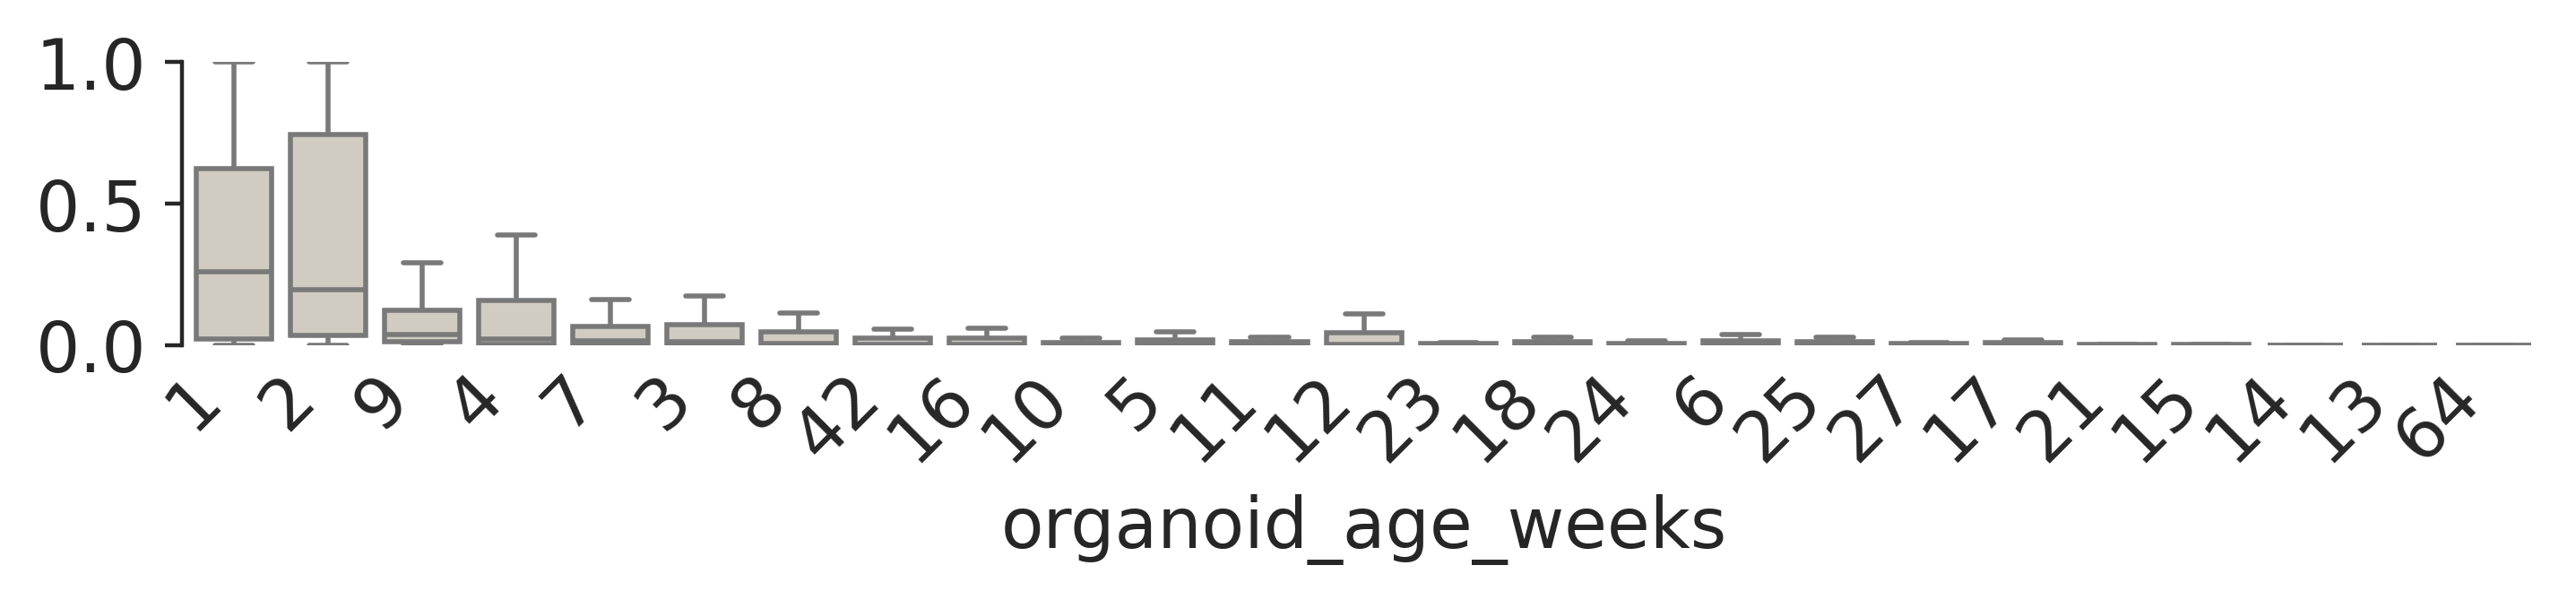

In [61]:
plot_barplots(hnoca_adata.obs, "organoid_age_weeks","presence_max_NPM", save=path_fig + 'HNOCA_mapping/NPM_organoid_age_weeks.pdf')

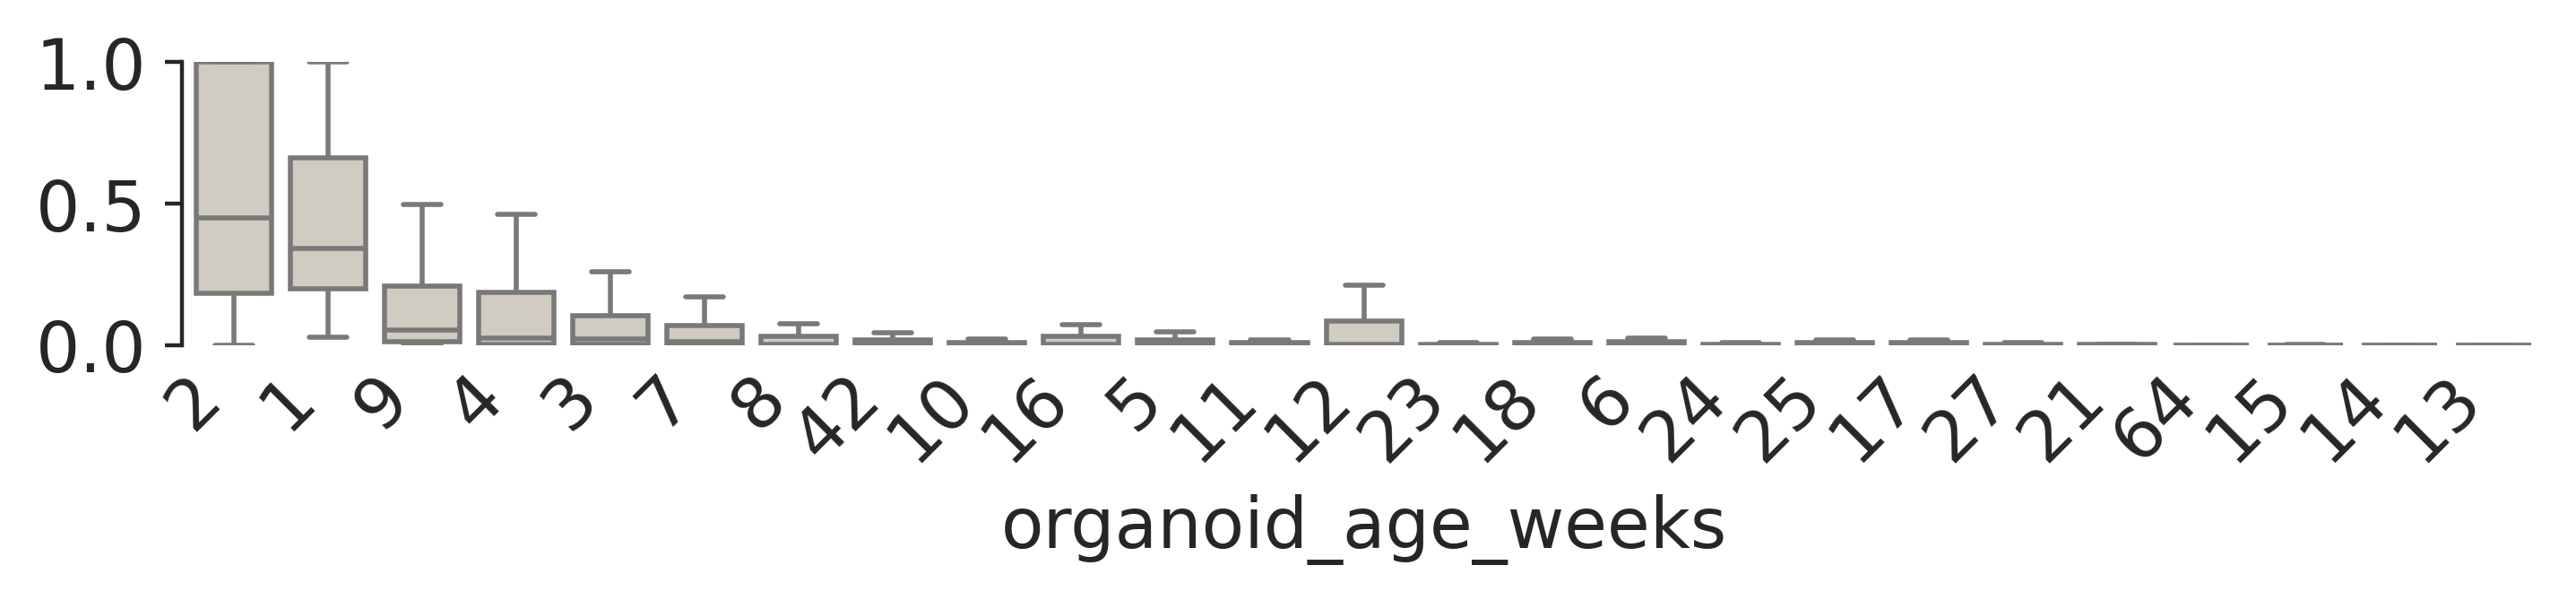

In [62]:
plot_barplots(hnoca_adata.obs, "organoid_age_weeks","presence_max_NIM", save=path_fig + 'HNOCA_mapping/NIM_organoid_age_weeks.pdf')

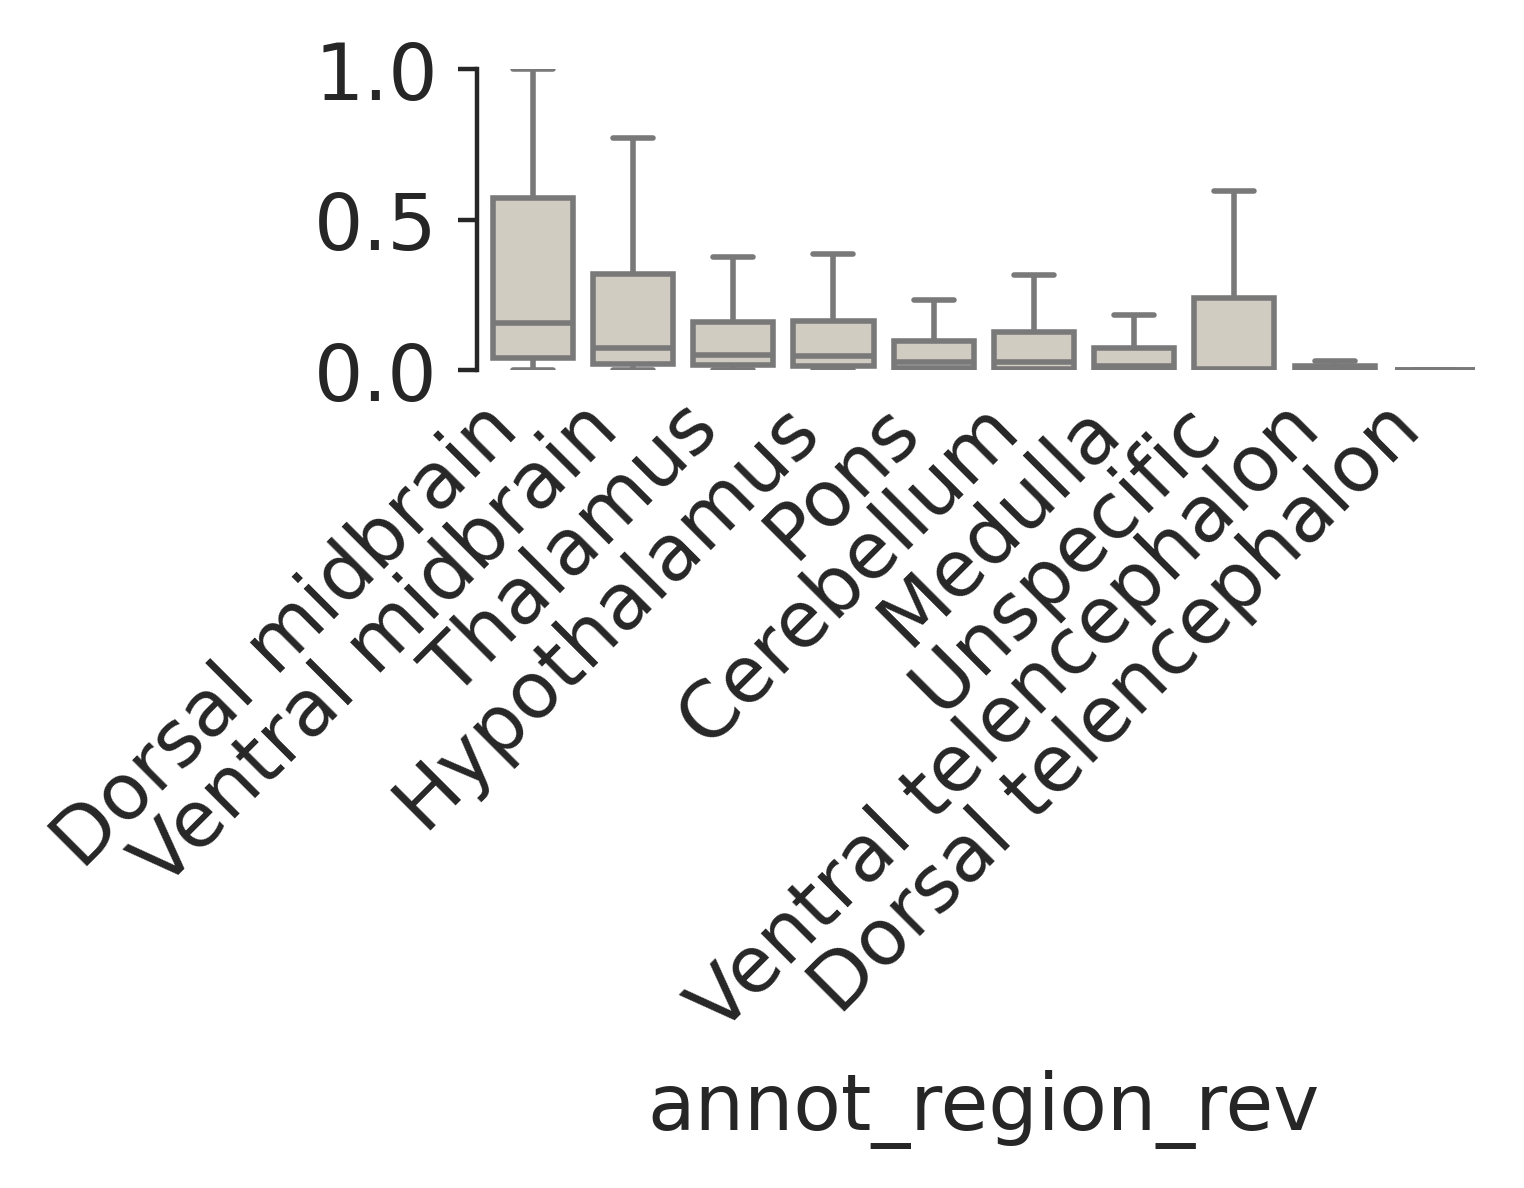

In [63]:
plot_barplots(hnoca_adata.obs, "annot_region_rev","presence_max_NIM", (4,4),path_fig + 'HNOCA_mapping/NIM_organoid_annot_region_rev.pdf')

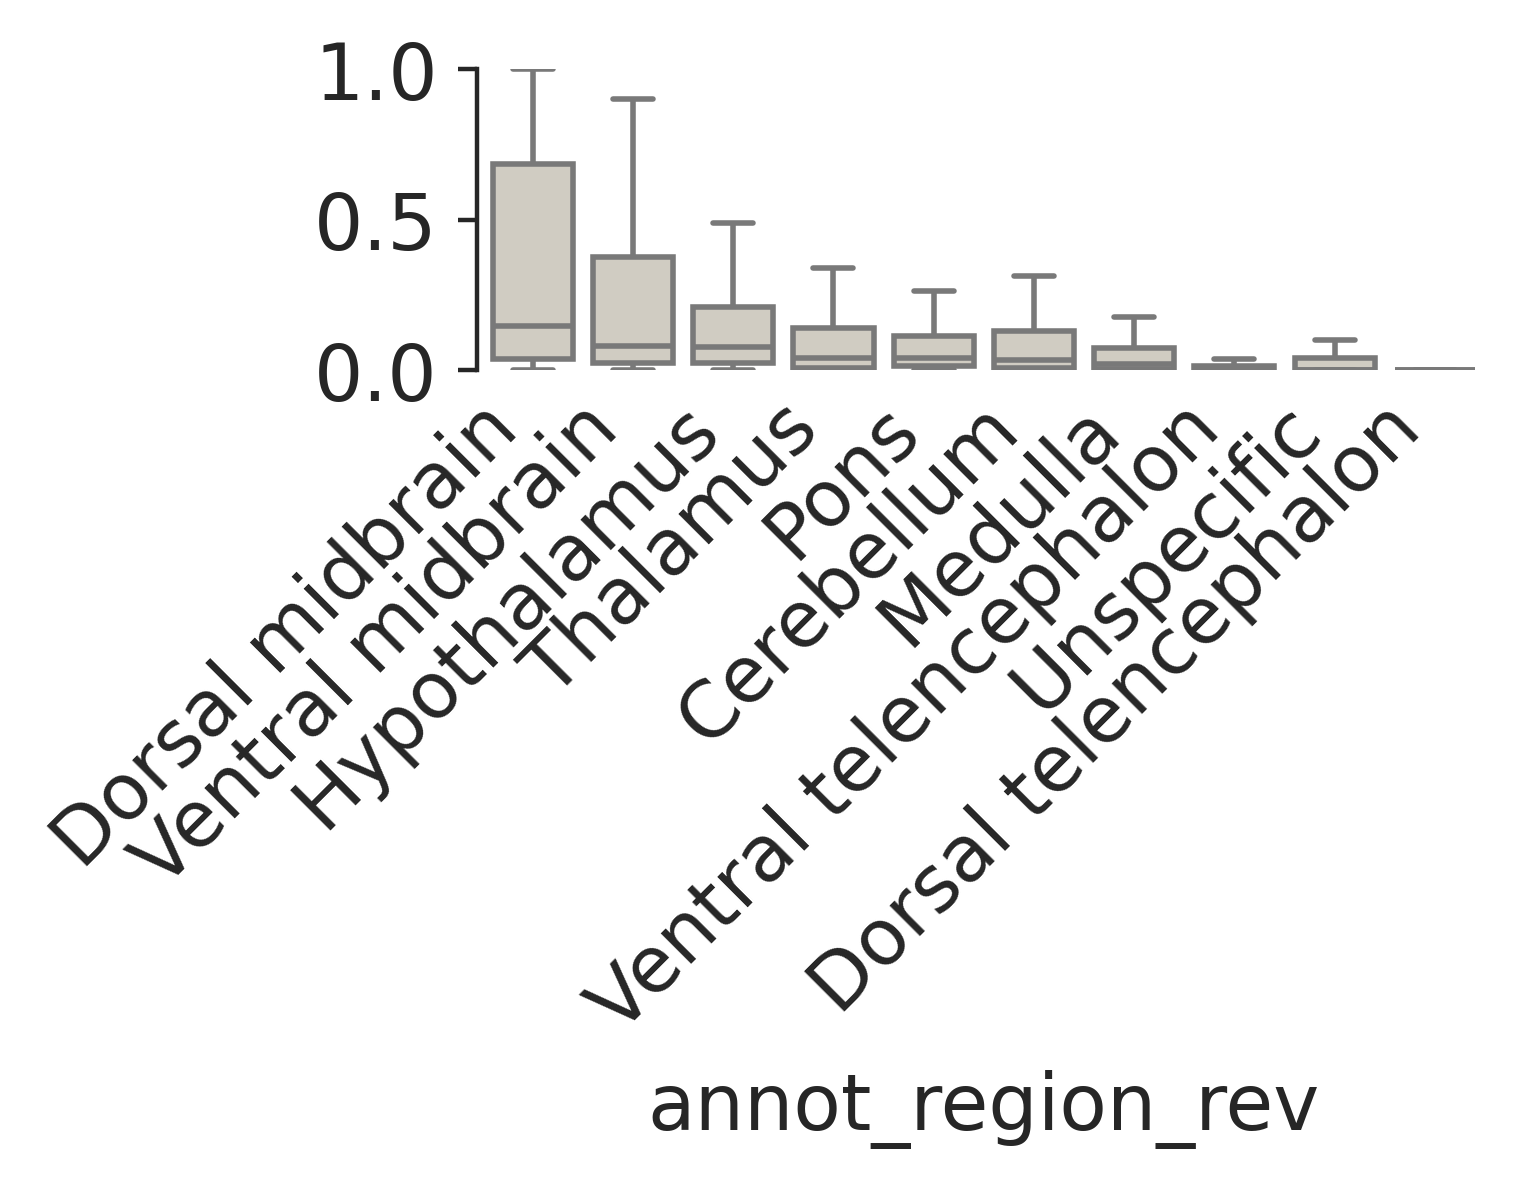

In [64]:
plot_barplots(hnoca_adata.obs, "annot_region_rev","presence_max_NPM", (4,4),path_fig + 'HNOCA_mapping/NPM_organoid_annot_region_rev.pdf')

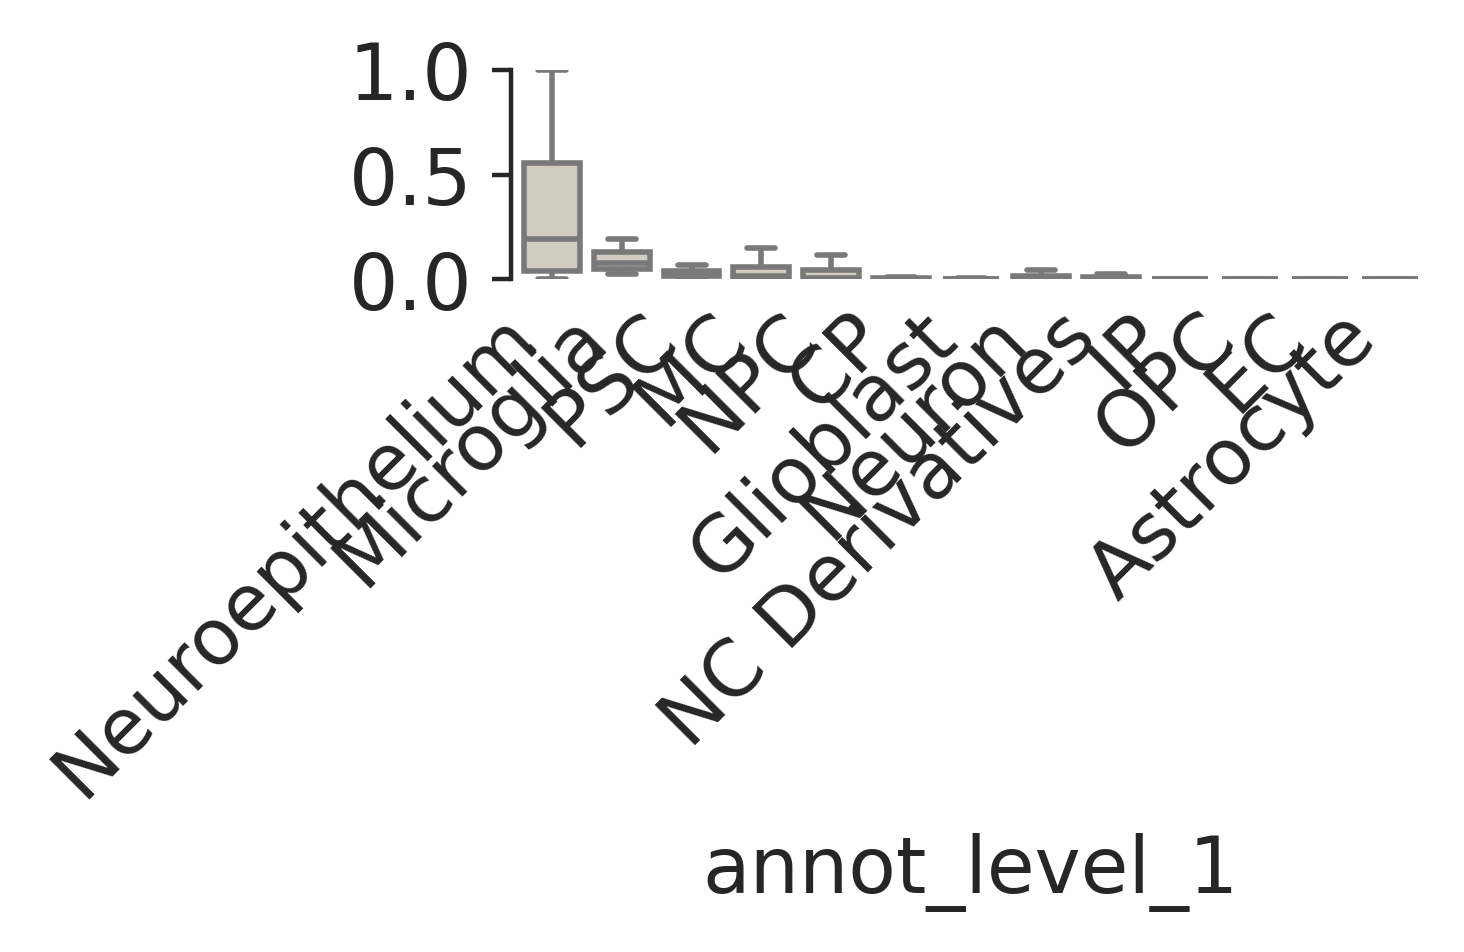

In [65]:
plot_barplots(hnoca_adata.obs, "annot_level_1","presence_max_NPM", save=path_fig + 'HNOCA_mapping/NPM_organoid_annot_level_1.pdf')

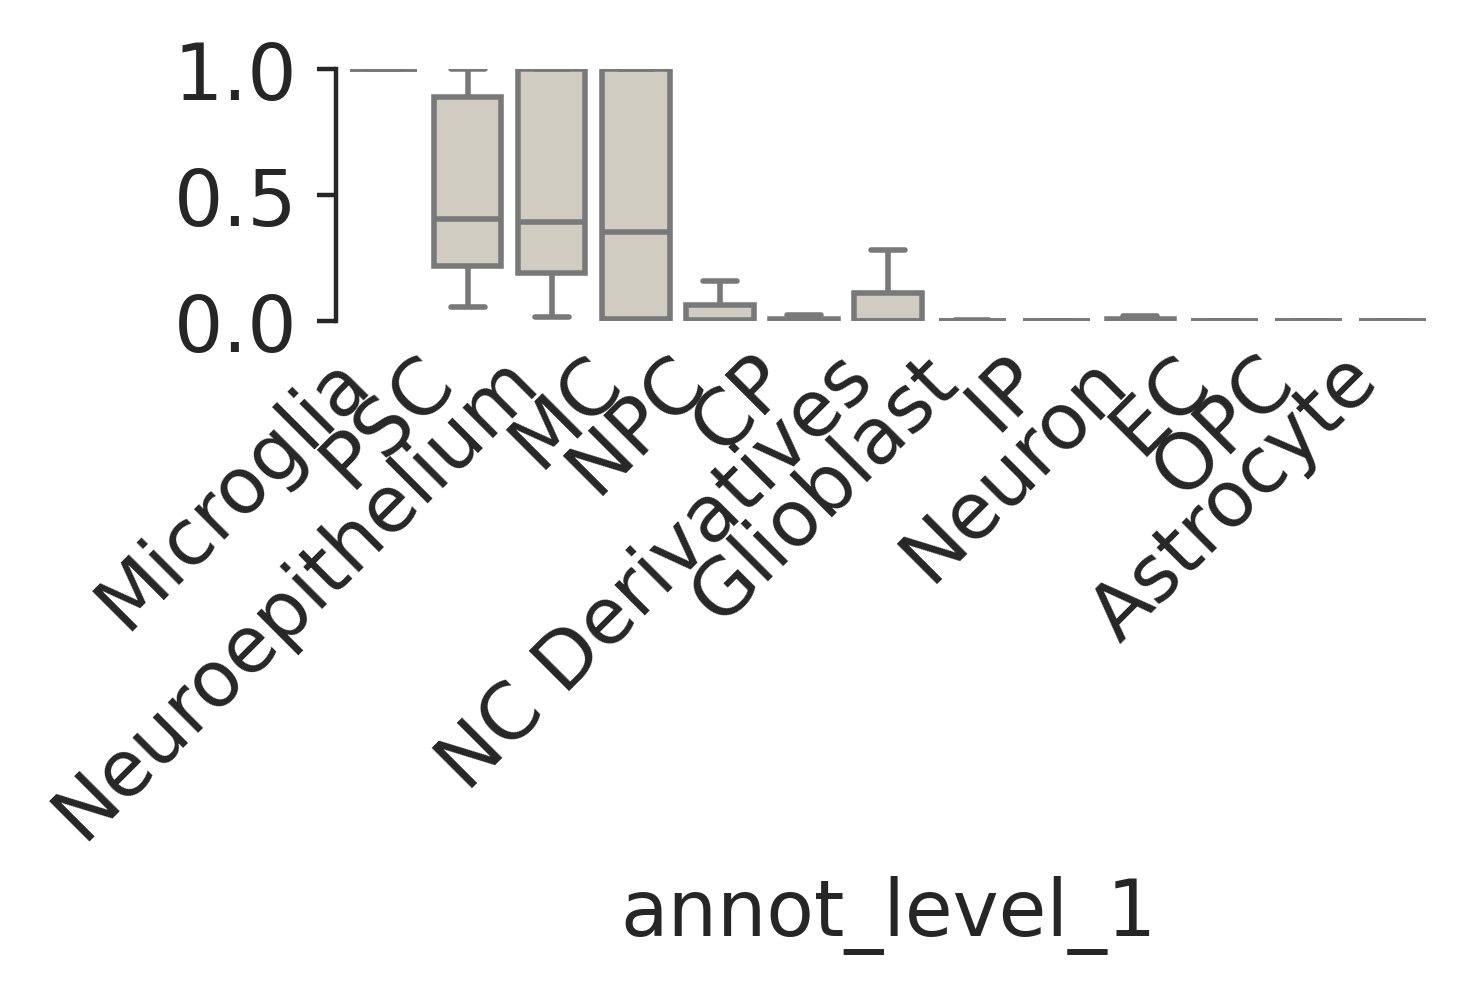

In [66]:
plot_barplots(hnoca_adata.obs, "annot_level_1","presence_max_NIM", save=path_fig + 'HNOCA_mapping/NIM_organoid_annot_level_1.pdf')

In [25]:
print(1)

1
The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
